# Расчётно-графическая работа №1
#### Выполнил: Сухов Николай Михайлович
#### Поток: 24.4
#### Вариант: 1 3

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import seaborn as sns
import sympy as sp

In [83]:
np.random.seed(7)

# Задание 1
Загрузим датафрейм

In [84]:
iris_url = "https://drive.google.com/file/d/1CSCheMzjberRwgcf90BBu-J6uxMg-Qf7/view"
iris_url = "https://drive.google.com/uc?id=" + iris_url.split('/')[-2]
data = pd.read_csv(iris_url)

data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Посмотрим, какой вид цветка представлен больше всего в датасете

In [85]:
species = data["Species"].unique()
print(species)

['setosa' 'versicolor' 'virginica']


In [86]:
species_count = {}
for key in species:
    species_count[key] = data["Species"].value_counts().get(key, 0)
    print(f"{key} : {species_count[key]}")

setosa : 50
versicolor : 50
virginica : 50


Как мы видим, каждый вид представлен в одном и том же количестве (50)


#### Расчёт выборочного средего, дисперсии, медианы и квантиля порядка 2/5 для оценки суммарной площади чашелистика и лепестка всей совокупности

Для начала для удобства добавим в фрейм столбец с площадью

In [87]:
data.insert(4, "Area", data["Sepal.Length"] * data["Sepal.Width"] + data["Petal.Length"] * data["Petal.Width"])
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Area,Species
0,5.1,3.5,1.4,0.2,18.13,setosa
1,4.9,3.0,1.4,0.2,14.98,setosa
2,4.7,3.2,1.3,0.2,15.30,setosa
3,4.6,3.1,1.5,0.2,14.56,setosa
4,5.0,3.6,1.4,0.2,18.28,setosa


**Выборочое среднее** считается по формуле $\hat{\alpha}=\overline{X}$

In [88]:
mean_all = data["Area"].mean()

print(f"Выборочное среднее: {round(mean_all, 5)}")

Выборочное среднее: 23.61693


**Дисперсия (несмещённая):** $S_n^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2=\overline{X^2}-(\overline{X})^2$

In [89]:
var_all = data["Area"].var()

print(f"Выборочная дисперсия: {round(var_all, 5)}")

Выборочная дисперсия: 47.90949


**Медианой $\text{med}X$** распределения называется квантиль порядка 0.5

**Квантиль** порядка $\alpha \in [0,1]$ распределения $P_X$ - это число $q_{P_X,\alpha}$, для которого $P(X\leq q_{P_X,\alpha})\geq\alpha$

In [90]:
med_all = data["Area"].quantile(q=0.5)

print(f"Выборочная медиана: {med_all}")

Выборочная медиана: 22.5


**Квантиль порядка 2/5**

In [91]:
quantile_all = data["Area"].quantile(q=2/5)

print(f"Выборочный квантиль 2/5 порядка: {round(quantile_all,  4)}")

Выборочный квантиль 2/5 порядка: 20.316


#### Расчёт выборочного средего, дисперсии, медианы и квантиля порядка 2/5 для оценки суммарной площади чашелистика и лепестка для каждого вида

**Выборочое среднее** 

In [92]:
mean_by_species = {}

for key in species:
    mean_by_species[key] = data["Area"].where(data["Species"] == key).dropna().mean()

print("Выборочное среднее:")
for key in species:
    print(f"\t-{key}{round(mean_by_species[key], 5):>{20 - len(key)}}")


Выборочное среднее:
	-setosa       17.6234
	-versicolor   22.2466
	-virginica    30.9808


**Дисперсия**

In [93]:
var_by_species = {}

for key in species:
    var_by_species[key] = data["Area"].where(data["Species"] == key).dropna().var()

print("Выборочная дисперсия:")
for key in species:
    print(f"\t-{key}{round(var_by_species[key], 5):>{20 - len(key)}}")

Выборочная дисперсия:
	-setosa       8.94006
	-versicolor  15.83411
	-virginica   27.00492


**Медиана**

In [94]:
med_by_species = {}

for key in species:
    med_by_species[key] = data["Area"].where(data["Species"] == key).dropna().quantile(q=0.5)

print("Выборочная медиана:")
for key in species:
    print(f"\t-{key}{round(med_by_species[key], 5):>{20 - len(key)}}")

Выборочная медиана:
	-setosa         17.66
	-versicolor     22.21
	-virginica     31.475


**Квантиль порядка 2/5**

In [95]:
quantile_by_species = {}

for key in species:
    quantile_by_species[key] = data["Area"].where(data["Species"] == key).dropna().quantile(q=2/5)

print("Выборочный квантиль 2/5 порядка:")
for key in species:
    print(f"\t-{key}{round(quantile_by_species[key], 5):>{20 - len(key)}}")

Выборочный квантиль 2/5 порядка:
	-setosa        16.736
	-versicolor    21.142
	-virginica     29.716


#### Графики эмпирической функции распределения, гистограмма, box-plot оценки суммарной площади чашелистика и лепестка всей совокупности

**Эмпирическая функция распределения**

Для выборки $X_1...X_n$ объёма n с теоретической функцией распределения $F(x):X_1...X_n\sim F(x)$. Тогда:
$$\mu_n(x)=\sum \textbf{1}(X_k\leq x);\ \ F_n(x)=\frac{\mu_n(x)}{n},$$
где $F_n(x)$ - эмпирическая функция распределения

**График эмпирической функции распределения**

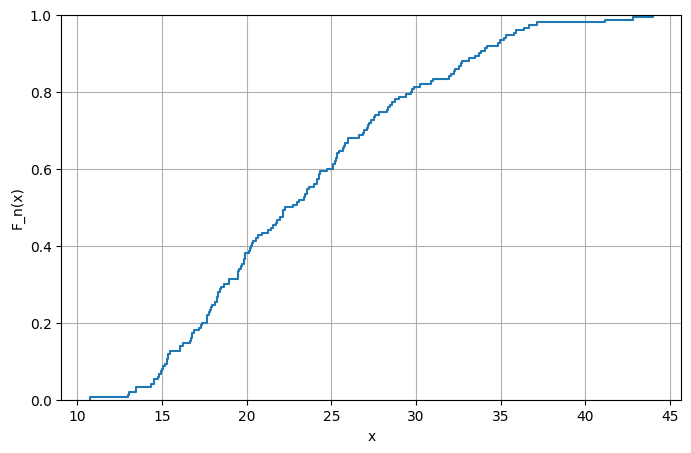

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.ecdf(data["Area"])
ax.set_xlabel("x")
ax.set_ylabel("F_n(x)")
ax.grid(True)
ax.set_axisbelow(True)
    
plt.show()

**Гистограмма**

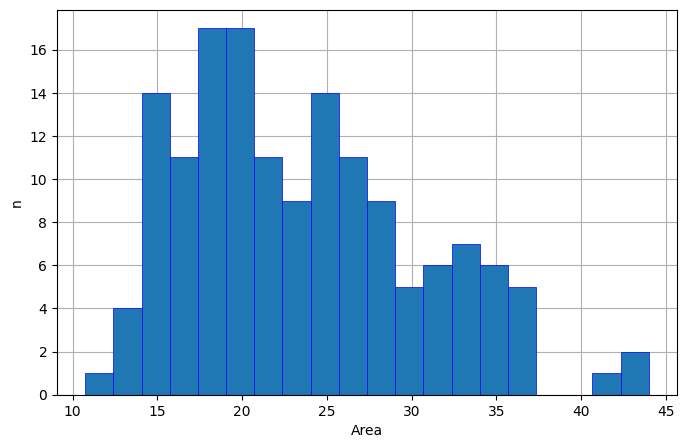

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist(x=data["Area"], bins=20, edgecolor="blue", linewidth=0.5)
ax.set_xlabel("Area")
ax.set_ylabel("n")
ax.grid(True)
ax.set_axisbelow(True)
    
plt.show()

**Box-plot**

Для построения box-plot нужно найти его нижний квартиль, медиану и верхний квартиль. Над прямой, отображающей значение величины из выборки, строим прямоугольник в пределах квартилей и явно отображаем медиану. В стороны от прямоугольника строим промежутки, равные $3/2 \cdot \text{IQR}$. Значения из выборки, которые не попадают в прямоугольник или в промежутки, являются выбросами, и их помечаем точками отдельно.

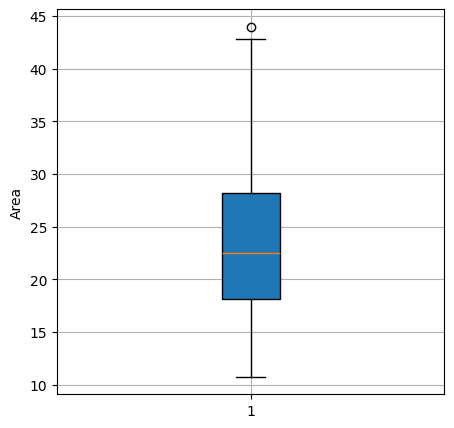

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.boxplot(data["Area"], patch_artist=True)
ax.set_ylabel("Area")
ax.grid(True)
ax.set_axisbelow(True)
    
plt.show()

#### Графики эмпирической функции распределения, гистограмма, box-plot оценки суммарной площади чашелистика и лепестка для каждого вида

**Графики эмпирической функции распределения**

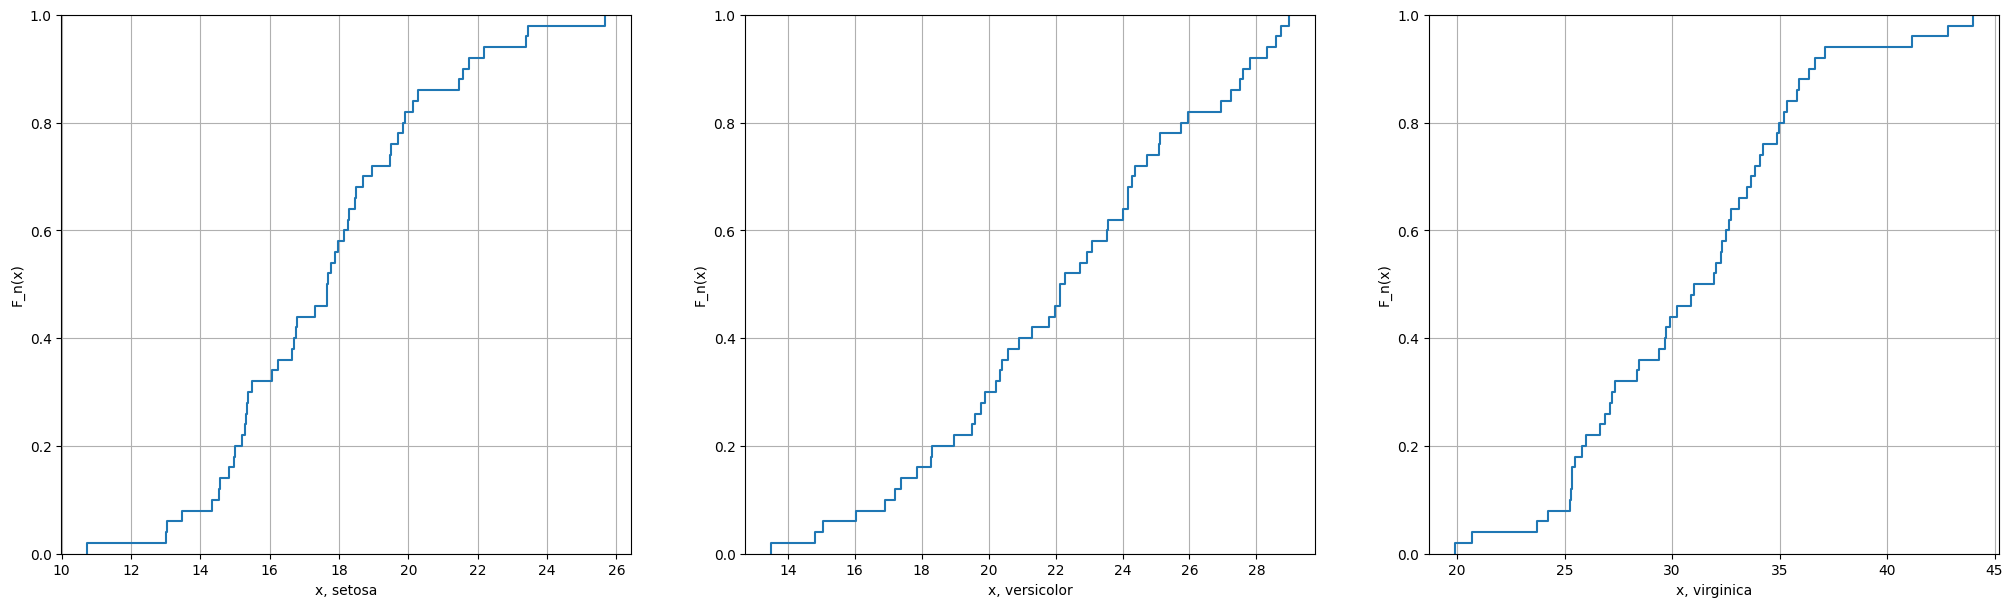

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(25, 7))

for i, key in enumerate(species):
    ax[i].ecdf(data["Area"].where(data["Species"] == key).dropna())
    ax[i].set_xlabel("x, " + key)
    ax[i].set_ylabel("F_n(x)")
    ax[i].grid(True)
    ax[i].set_axisbelow(True)

**Гистограмма**

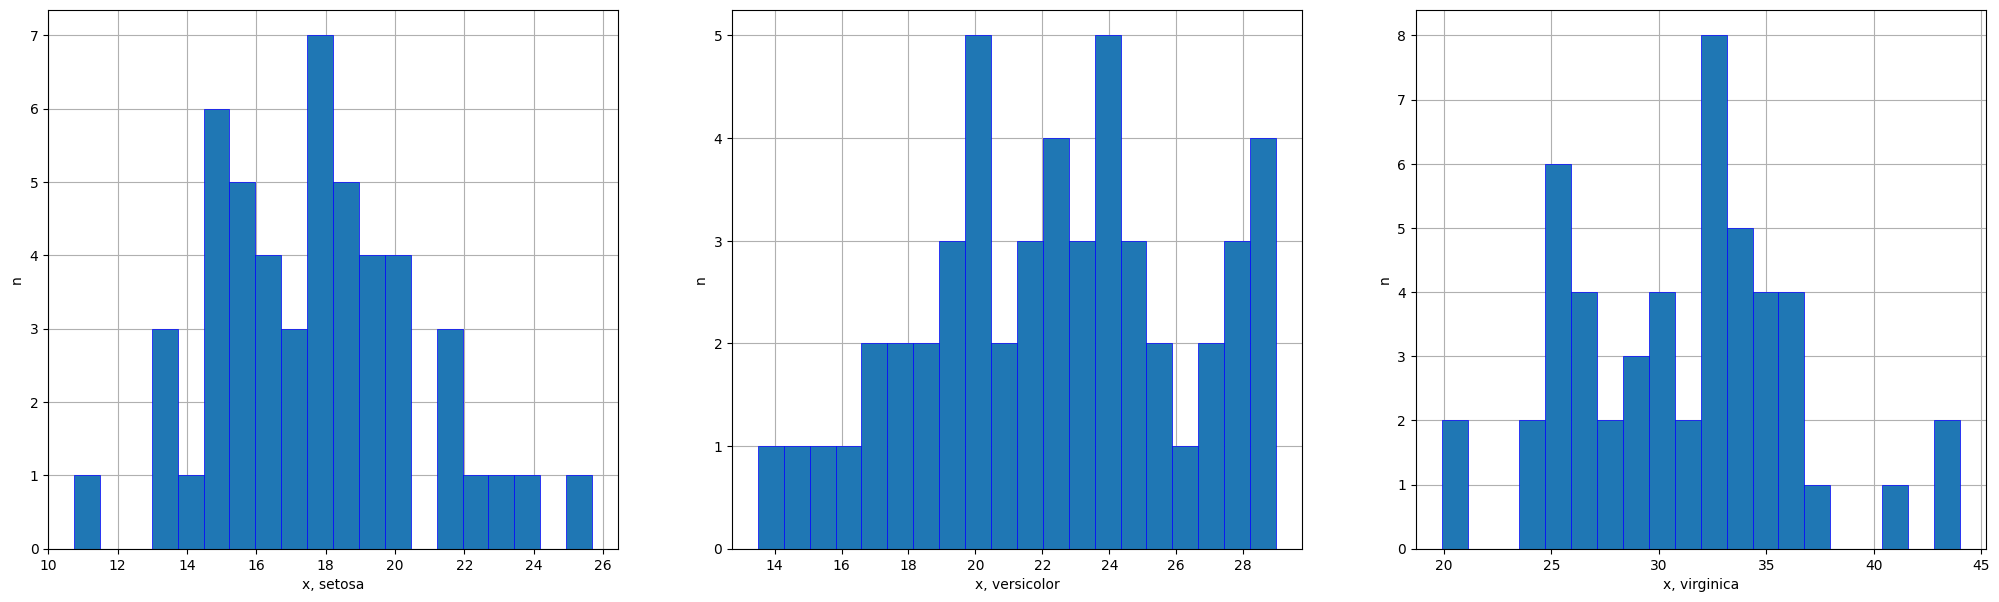

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(25, 7))

for i, key in enumerate(species):
    ax[i].hist(x=data["Area"].where(data["Species"] == key).dropna(), bins=20, edgecolor="blue", linewidth=0.5)
    ax[i].set_xlabel("x, " + key)
    ax[i].set_ylabel("n")
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
    
plt.show()

**Box-plot**

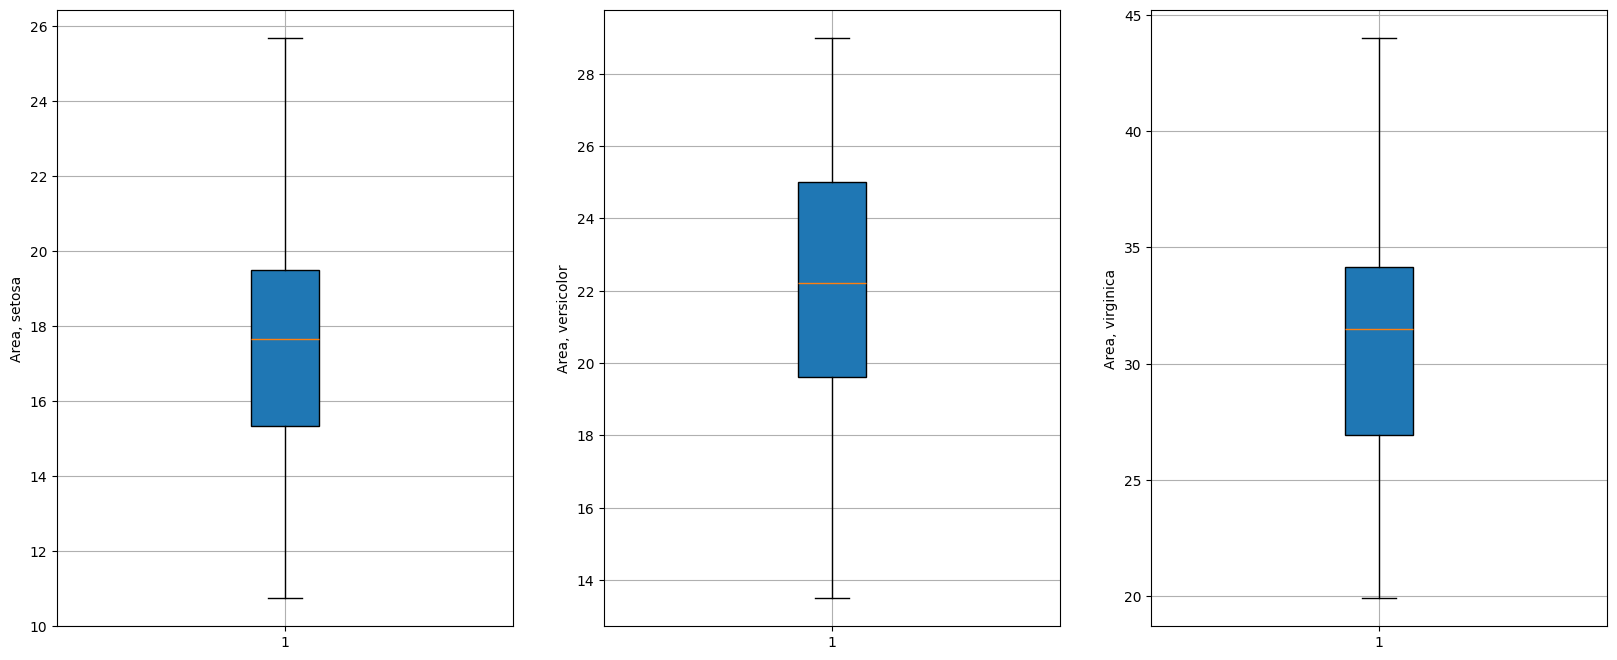

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

for i, key in enumerate(species):
    ax[i].boxplot(data["Area"].where(data["Species"] == key).dropna(), patch_artist=True)
    ax[i].set_ylabel("Area, " + key)
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
        
plt.show()

# Задание 2

Распределение показателя, рассмотренного в задании 1, похоже на **Гамма-распределение**:
$$\Gamma(k,\lambda), \text{где } k,\lambda >0$$
$$p(x)=\frac{\lambda^kx^{k-1}}{\Gamma(k)}e^{-\lambda x}\textbf{1}(x\geq0), \Gamma(k) - \text{Гамма функция Эйлера},$$
$$\Gamma(k)=\int_0^\infty t^{k-1}e^{-t}dt,\ k\in\mathbb{C},\ \text{Re}(k)>0$$

Воспользуемся **методом моментов**, чтобы оценить его параметры:
-  Мы выбрали Гамма-распределение
-  Будем использовать 1-й и 2-й моменты (мат. ожидание и дисперсию)
-  Выразим теоретические моменты через параметры распределения
-  Вычислим (или возьмём уже вычисленные) оценки этих моментов на основе выборки
$$
\left\{
\begin{gathered}
\text{E}X=\int_0^\infty x\cdot \frac{\lambda^kx^{k-1}}{\Gamma(k)}e^{-\lambda x}dx=\overline{X}\\
\text{E}(X-\text{E}X)^2=\frac{n}{n-1}\left(\int_0^\infty x^2\cdot \frac{\lambda^kx^{k-1}}{\Gamma(k)}e^{-\lambda x}dx-\text{E}^2X \right)=\frac{n}{n-1}\left(\overline{X^2}-(\overline{X})^2 \right)
\\

\end{gathered}
\right.
$$
-  Приравняем теоретические моменты к их оценкам и решим уравнение относительно параметров распределения
$$
1.\text{E}X=\int_0^\infty x\cdot \frac{\lambda^kx^{k-1}}{\Gamma(k)}e^{-\lambda x}dx=\frac{1}{\lambda\Gamma(k)}\int_0^\infty (\lambda x)^k\cdot e^{-\lambda x}d(\lambda x)=\frac{\Gamma(k+1)}{\lambda\Gamma(k)}=\frac{k}{\lambda}\ (\text{Используя свойства Гамма-функции})
\\
2.\text{E}X^2=\int_0^\infty x^2\cdot \frac{\lambda^kx^{k-1}}{\Gamma(k)}e^{-\lambda x}dx=\frac{1}{\lambda^2\Gamma(k)}\int_0^\infty (\lambda x)^{k+1}\cdot e^{-\lambda x}d(\lambda x)=\frac{\Gamma(k+2)}{\lambda^2\Gamma(k)}=\frac{k^2+k}{\lambda^2}
$$
$$
\text{Var}X=\text{E}(X-\text{E}X)^2=\frac{n}{n-1}\left(\frac{k^2+k}{\lambda^2}-\left(\frac{k}{\lambda}\right)^2\right)=\frac{n}{n-1}\frac{k}{\lambda^2}
$$
$$
\left\{
\begin{gathered}
\frac{k}{\lambda}=23.61693\\
\frac{n}{n-1}\frac{k}{\lambda^2}=47.90949
\end{gathered}
\right.;\quad

23.61693\lambda=\frac{149}{150}47.90949\lambda^2
$$


In [102]:
Lambda = mean_all / var_all * 150 / 149
k = mean_all * Lambda
print(f"k={round(k, 5)}, lambda={round(Lambda, 5)}")

k=11.72008, lambda=0.49626


$$

\left\{
\begin{gathered}
k=11.72008\\
\lambda=0.49626
\end{gathered}
\right.
$$
-  Получим оценки, которые можно использовать для описания и анализа выборки

Отметим, что все оценки, полученные по методу моментов, являются **состоятельными** (следует из закона больших чисел, так как $\text{E}X_n\rightarrow \overline{X_n}$ при $n\rightarrow\infty$)

Оценка является **несмещённой**:

1.$\text{E}(\overline{X})=\text{E}\frac{1}{n}\sum_{i=0}^nX_i=\frac{1}{n}\sum_{i=0}^n\text{E}X_i=\frac{1}{n}\sum_{i=0}^nX_i=\overline{X}$

2.$\text{E}\left(\frac{n}{n-1}\left(\overline{X^2}-(\overline{X})^2 \right)\right)=\frac{1}{n-1}\sum_{i=0}^n\text{E}X_i^2-\frac{1}{n(n-1)}\sum_{i=0}^n\text{E}X_i^2=\frac{n}{n-1}\overline{X^2}-\frac{n}{n-1}(\overline{X})^2$
Для наглядности, сравним наше распределение с Гамма-распределением с полученными параметрами:

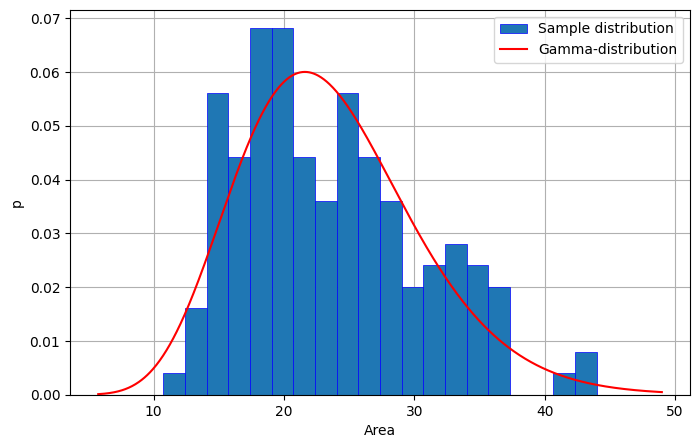

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

x = np.linspace(data["Area"].min()-5, data["Area"].max()+5, 1000)
gamma = sc.stats.gamma.pdf(x, a=k, scale=1/Lambda)

ax.hist(x=data["Area"], density=True, bins=20, edgecolor="blue", linewidth=0.5, label="Sample distribution")
ax.plot(x, gamma, label="Gamma-distribution", color="red")
ax.set_xlabel("Area")
ax.set_ylabel("p")
ax.grid(True)
ax.set_axisbelow(True)
ax.legend()

plt.show()

**Теоретическое смещение** равно 0, так как оценка несмещённая.

**Дисперсия:** $\text{Var}X=\frac{n}{n-1}\frac{k}{\lambda^2}=\frac{150}{149}\cdot\frac{11.72008}{0.49626^2}=47.90949388814318$

In [104]:
theor_var = 150 / 149 * k / Lambda ** 2
print(theor_var)

47.90949388814318


Найдём информацию Фишера: $I(\Theta)=-E_\Theta\left(\frac{\partial^2 lnL(\Theta, x_1,...,x_n)}{\partial\Theta^2}\right)$, где $L(\Theta, x_1,...,x_n)$ - функция правдоподобия.

In [105]:
x, k_, lam = sp.symbols('x k lambda', positive=True)

log_gamma = k_ * sp.log(lam) + (k_ - 1) * sp.log(x) - sp.log(sp.gamma(k_)) - lam * x

theta = sp.Matrix([k_, lam])

hessian = log_gamma.diff(theta).jacobian(theta)
hessian_simplified = sp.simplify(hessian)

sp.pprint(hessian_simplified)

⎡                   1 ⎤
⎢-polygamma(1, k)   ─ ⎥
⎢                   λ ⎥
⎢                     ⎥
⎢       1          -k ⎥
⎢       ─          ───⎥
⎢       λ           2 ⎥
⎣                  λ  ⎦


Тогда $I(\Theta)=\begin{bmatrix}  \frac{d^2}{dk^2}ln\Gamma(k) & -\frac{1}{\lambda} \\\ -\frac{1}{\lambda} & \frac{k}{\lambda^2} \end{bmatrix}$

Вычислим:

In [106]:
polyg = float(sc.special.polygamma(1, k))
hs = -1 * np.array(hessian_simplified.subs({k_: k, lam: Lambda}))
hs[0][0] = polyg
print(hs)

[[0.08906712460086919 -2.01508369399734]
 [-2.01508369399734 47.5900972622222]]


**Эффективной** называется оценка, которая имеет наименьший возможный разброс среди всех несмещенных оценок. Так как в данной работе мы оцениваем выборку только одним способом, не можем ничего сказать об эффективности оценки.

**MSE** совпадает с дисперсией в силу несмещённости оценки.

# Задание 3

Зафиксируем $k=15, \lambda=1$

In [107]:
k_new = 15
lambda_new = 1

#Массив объемов выборок
n_samples = [100, 200, 350, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 25000, 40000, 50000, 60000, 80000, 100000]
samples = []
lambda_samp = []
k_samp = []

for n in n_samples:
    sample = sc.stats.gamma.rvs(size=n, a=k_new, scale=1/lambda_new)

    mean_s = np.mean(sample)
    var_s = np.var(sample)
    lambda_s = mean_s / var_s * n / (n - 1)
    k_s = mean_s * lambda_s

    k_samp.append(k_s)
    lambda_samp.append(lambda_s)
    samples.append(sample)

    print(f"n={n:>7} : k={round(k_s, 5):<9} lambda={round(lambda_s, 5):<8} mean={round(mean_s, 5):<9} var={round(var_s, 5):<9}")



n=    100 : k=17.65818  lambda=1.19154  mean=14.81963  var=12.56301 
n=    200 : k=15.76523  lambda=1.08551  mean=14.52338  var=13.44658 
n=    350 : k=16.67095  lambda=1.1059   mean=15.07453  var=13.67004 
n=    500 : k=13.4815   lambda=0.90954  mean=14.82225  var=16.329   
n=    750 : k=14.90585  lambda=0.9913   mean=15.0367   var=15.18895 
n=   1000 : k=15.58602  lambda=1.04929  mean=14.85392  var=14.17038 
n=   1500 : k=16.08856  lambda=1.08403  mean=14.84138  var=13.70001 
n=   2000 : k=16.05979  lambda=1.06722  mean=15.04818  var=14.10735 
n=   3000 : k=15.65279  lambda=1.04998  mean=14.90778  var=14.20295 
n=   4000 : k=14.48906  lambda=0.96881  mean=14.95558  var=15.44097 
n=   5000 : k=15.47981  lambda=1.03186  mean=15.00191  var=14.54168 
n=   7500 : k=15.23702  lambda=1.01707  mean=14.98135  var=14.73193 
n=  10000 : k=15.12278  lambda=1.01126  mean=14.95437  var=14.78931 
n=  15000 : k=14.84807  lambda=0.98898  mean=15.01352  var=15.18182 
n=  25000 : k=14.87287  lambda=0.9

Построим графики

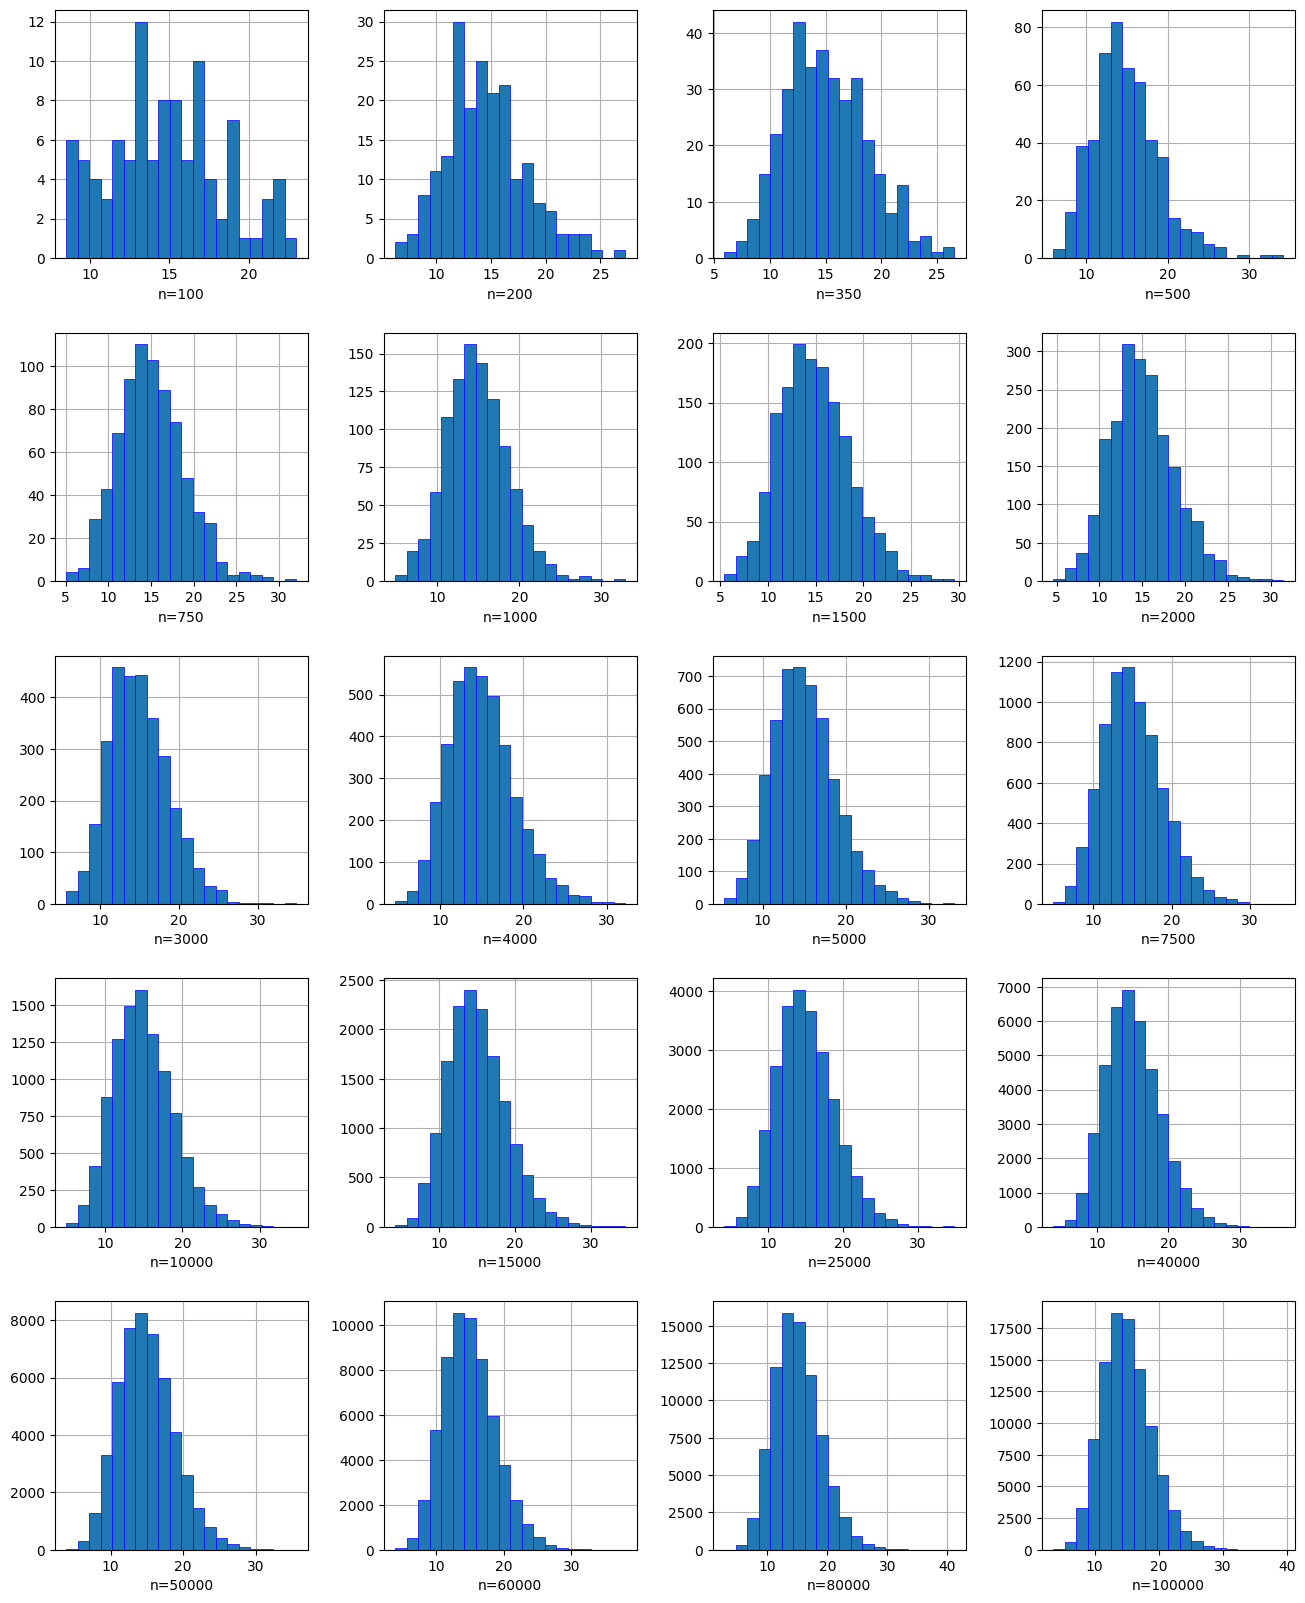

In [108]:
fig, axes = plt.subplots(5, 4, figsize=(16, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)


for i, sample in enumerate(samples):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    ax.hist(x=sample, bins=20, edgecolor="blue", linewidth=0.5)
    ax.set_xlabel(f"n={len(sample)}")
    ax.grid(True)
    ax.set_axisbelow(True)

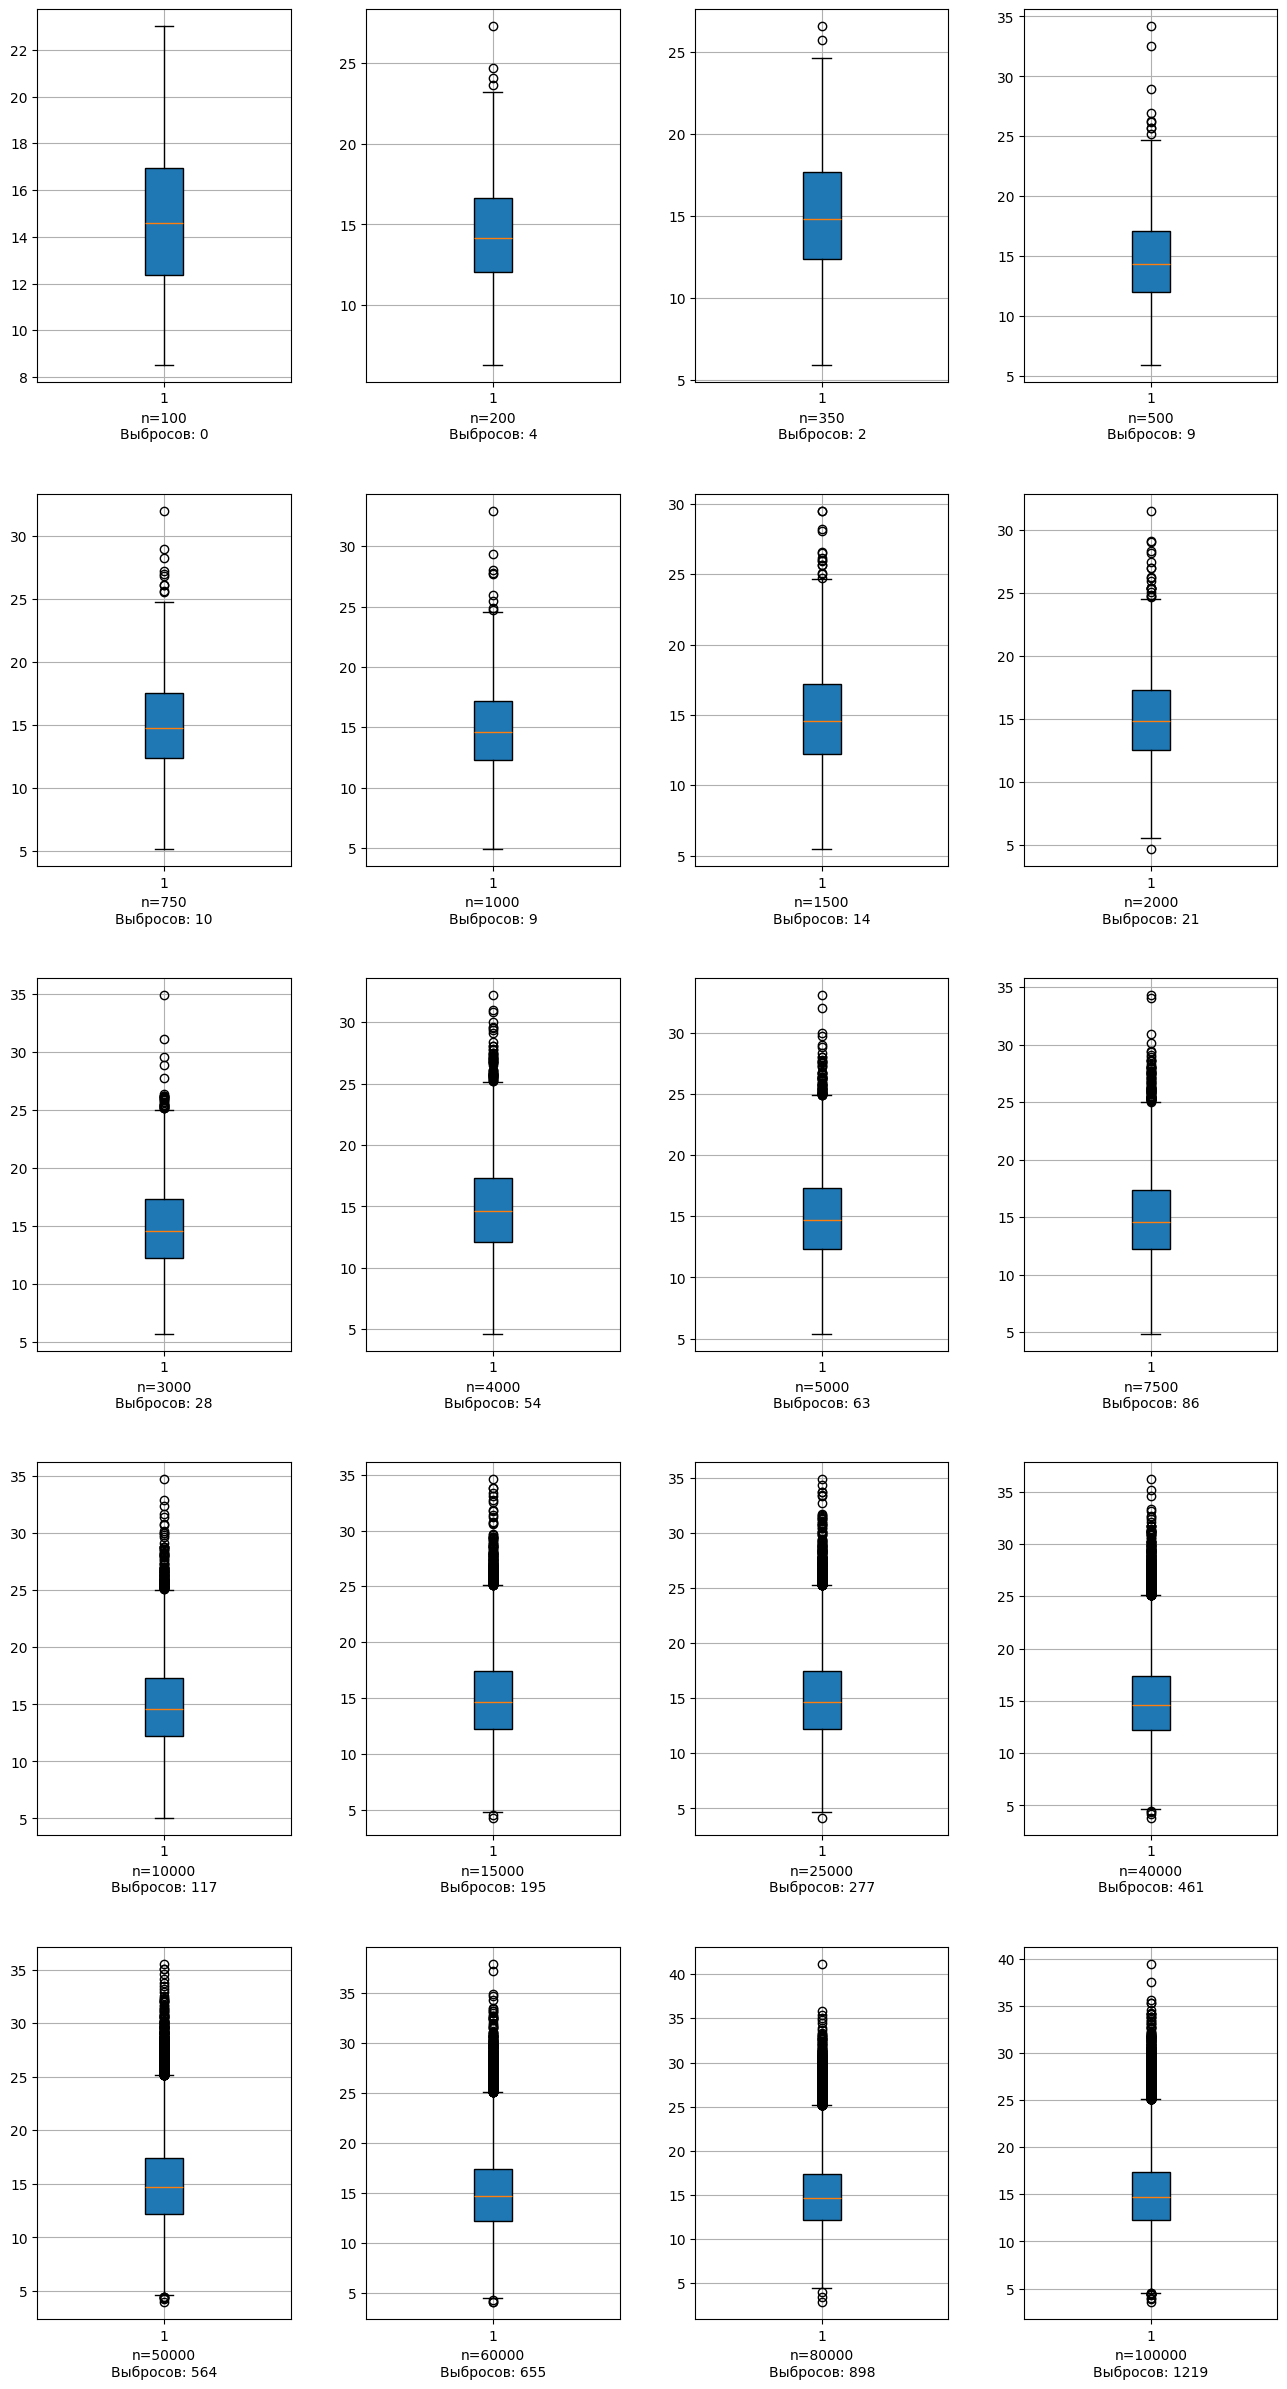

In [109]:
fig, axes = plt.subplots(5, 4, figsize=(16, 30))
fig.subplots_adjust(hspace=0.3, wspace=0.3)


for i, sample in enumerate(samples):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    box_plt = ax.boxplot(x=sample,  patch_artist=True)
    outliers = box_plt["fliers"][0].get_data()[1]
    num_outliers = len(outliers)
    ax.set_xlabel(f"n={len(sample)}\nВыбросов: {num_outliers}")
    ax.grid(True)
    ax.set_axisbelow(True)

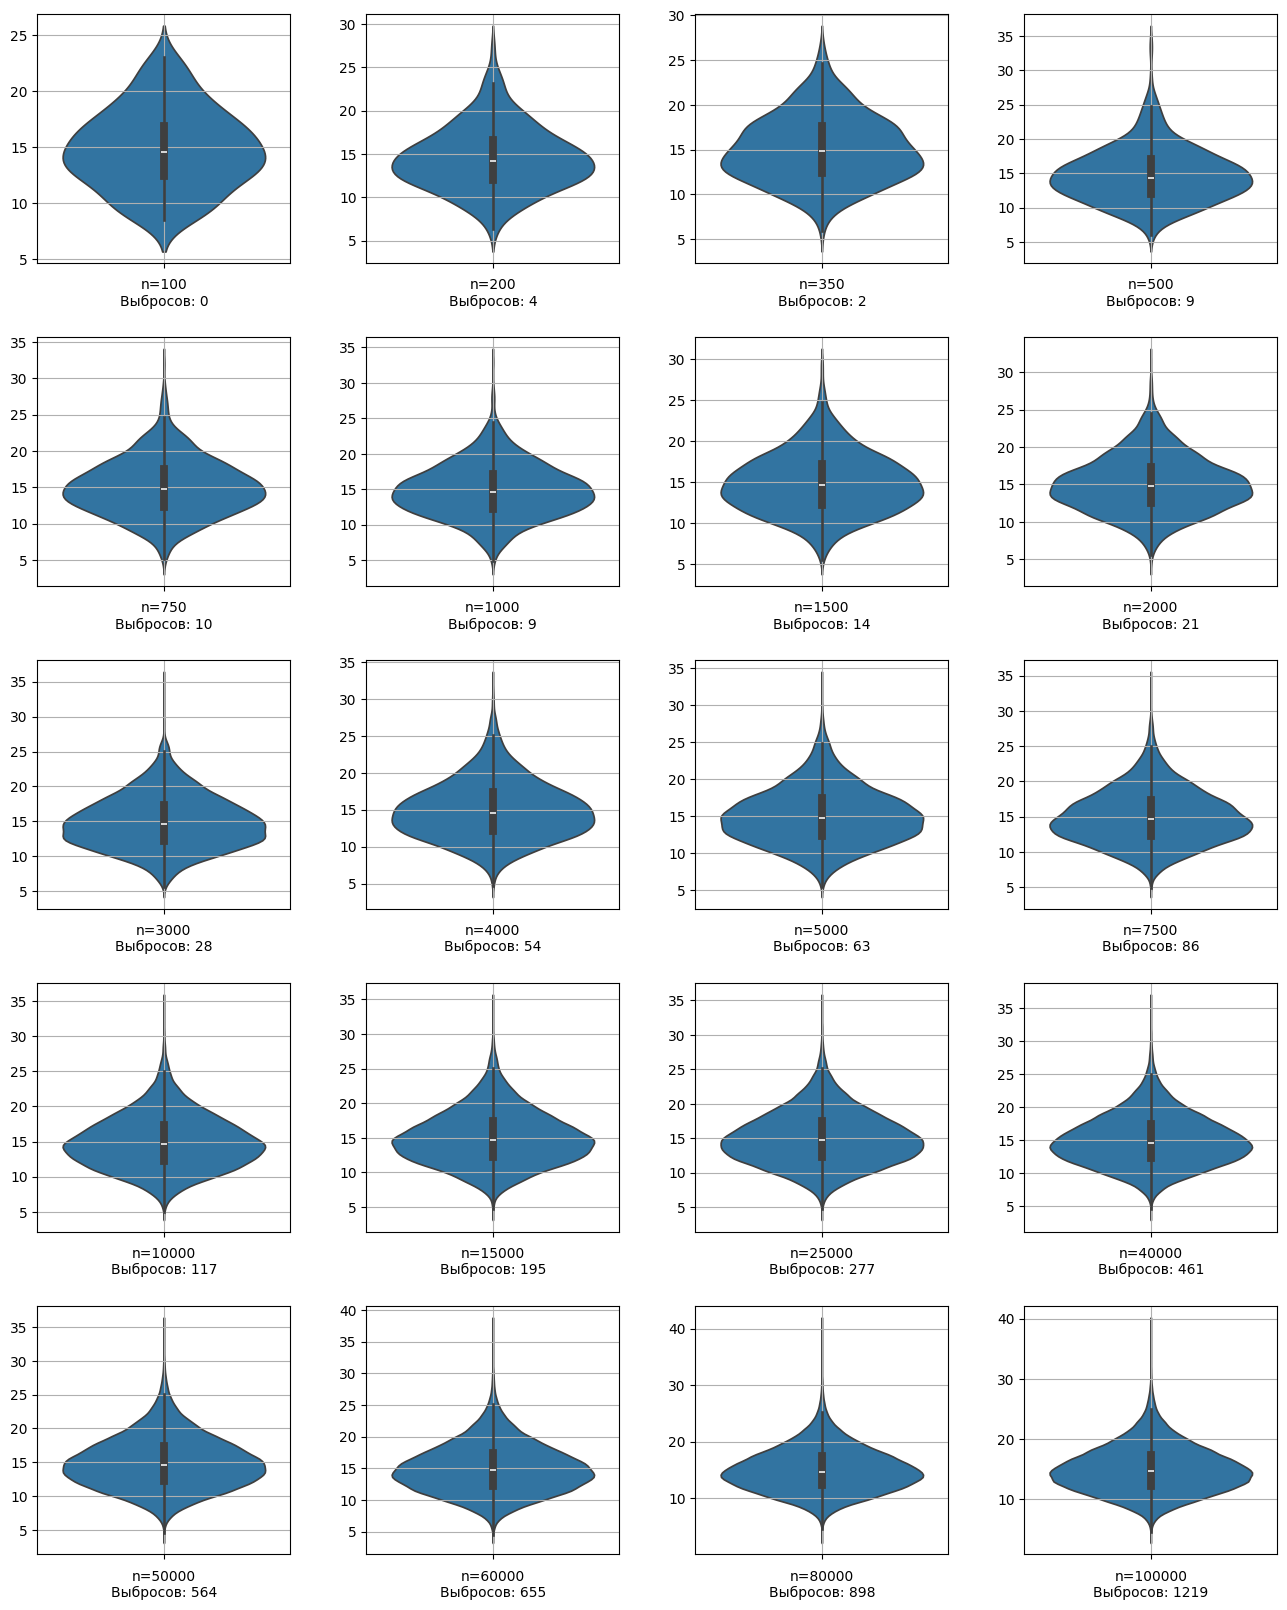

In [110]:

fig, axes = plt.subplots(5, 4, figsize=(16, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, sample in enumerate(samples):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    
    sns.violinplot(y=sample, ax=ax)
    
    q1, q3 = np.percentile(sample, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in sample if x < lower_bound or x > upper_bound]
    num_outliers = len(outliers)

    ax.grid(True)
    ax.set_xlabel(f"n={len(sample)}\nВыбросов: {num_outliers}")